In [13]:
import pandas as pd
import numpy as np

import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### LOAD DATA

In [14]:
path = ("/Users/pastudilloe/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/2 - USFQ Data Hub/1 - DATA/")

In [15]:
data_EDU = pd.read_csv(path+'Files Open Data/mineduc_registroadministrativohistorico_2009-2020fin.csv', sep = ';', encoding='latin-1')
data_EDU = data_EDU[['Clave_periodo', 'Zona', 'Provincia', 'Canton', 'Cod_Parroquia', 'Sostenimiento', 'Jornada', 'Acceso_Edificio', 'Total_estudiantes', 'Promovidos', 'No promovidos', 'Abandono']]


### DATA PROCESSING

In [16]:
data_EDU['COUNT'] = 1
#data_EDU_1 = data_EDU.groupby(['Clave_periodo', 'Provincia', 'Canton', 'Cod_Parroquia', 'Sostenimiento', 'Acceso_Edificio']).agg({'Total_estudiantes':'sum', 'Promovidos':'sum', 'No promovidos':'sum', 'Abandono':'sum', 'COUNT':'sum'}).reset_index()
data_EDU_1 = data_EDU.groupby(['Clave_periodo', 'Provincia', 'Canton']).agg({'Total_estudiantes':'sum', 'Promovidos':'sum', 'No promovidos':'sum', 'Abandono':'sum', 'COUNT':'sum'}).reset_index()

data_EDU_1.head(5)

,Clave_periodo,Provincia,Canton,Total_estudiantes,Promovidos,No promovidos,Abandono,COUNT
0,2009-2010,AZUAY,CAMILO PONCE ENRIQUEZ,4736,4394,117,225,58
1,2009-2010,AZUAY,CHORDELEG,3421,3183,110,128,16
2,2009-2010,AZUAY,CUENCA,135214,124097,4810,6307,593
3,2009-2010,AZUAY,EL PAN,572,522,17,33,8
4,2009-2010,AZUAY,GIRON,3123,2874,96,153,33


In [17]:
data_EDU_1['%_Prom'] = data_EDU_1['Promovidos'] * 100 / data_EDU_1['Total_estudiantes']
data_EDU_1['%_NoProm'] = data_EDU_1['No promovidos'] * 100 / data_EDU_1['Total_estudiantes']
data_EDU_1['%_Aband'] = data_EDU_1['Abandono'] * 100 / data_EDU_1['Total_estudiantes']

In [19]:
path1 = ("/Users/pastudilloe/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/")
data_EDU_1.to_csv(path1 + 'DHub DATA for WEBSITE/EC_Schools.csv')  


In [7]:
data_EDU_2 = data_EDU_1.loc[data_EDU_1['Clave_periodo'] == '2019-2020']

data_EDU_2_total_top20 = data_EDU_2.sort_values(by='Total_estudiantes', ascending = False).head(20)
data_EDU_2_total_bottom20 = data_EDU_2.sort_values(by='Total_estudiantes', ascending = True).head(20)

data_EDU_2_prom_top20 = data_EDU_2.sort_values(by='%_Prom', ascending = False).head(20)
data_EDU_2_prom_bottom20 = data_EDU_2.sort_values(by='%_Prom', ascending = True).head(20)

data_EDU_2_noprom_top20 = data_EDU_2.sort_values(by='%_NoProm', ascending = False).head(20)
data_EDU_2_noprom_bottom20 = data_EDU_2.sort_values(by='%_NoProm', ascending = True).head(20)

data_EDU_2_aband_top20 = data_EDU_2.sort_values(by='%_Aband', ascending = False).head(20)
data_EDU_2_aband_bottom20 = data_EDU_2.sort_values(by='%_Aband', ascending = True).head(20)

<AxesSubplot:xlabel='Total_estudiantes', ylabel='Canton'>

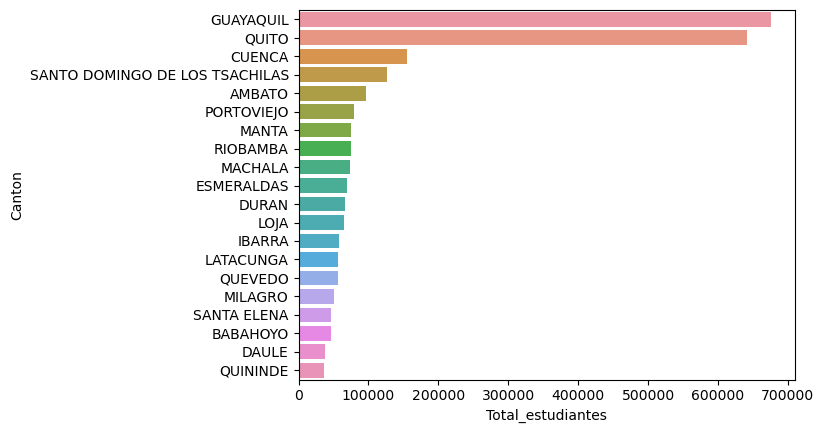

In [8]:
sns.barplot(data=data_EDU_2_total_top20, x="Total_estudiantes", y="Canton")

<AxesSubplot:xlabel='Total_estudiantes', ylabel='Canton'>

/Users/pastudilloe/opt/anaconda3/envs/py37/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


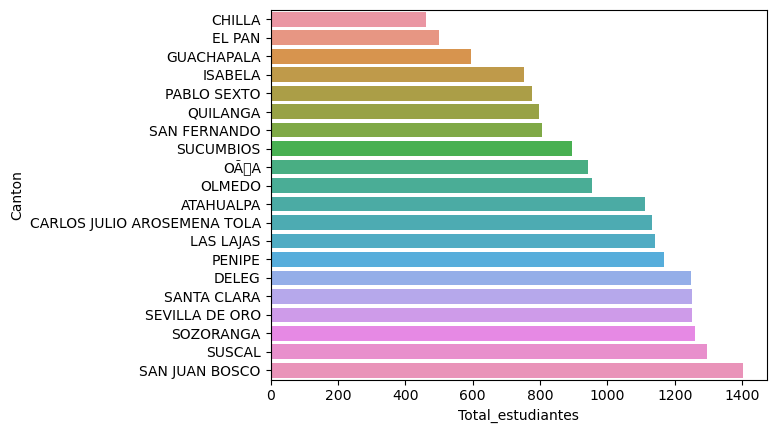

In [9]:
sns.barplot(data=data_EDU_2_total_bottom20, x="Total_estudiantes", y="Canton")

<AxesSubplot:xlabel='%_NoProm', ylabel='Canton'>

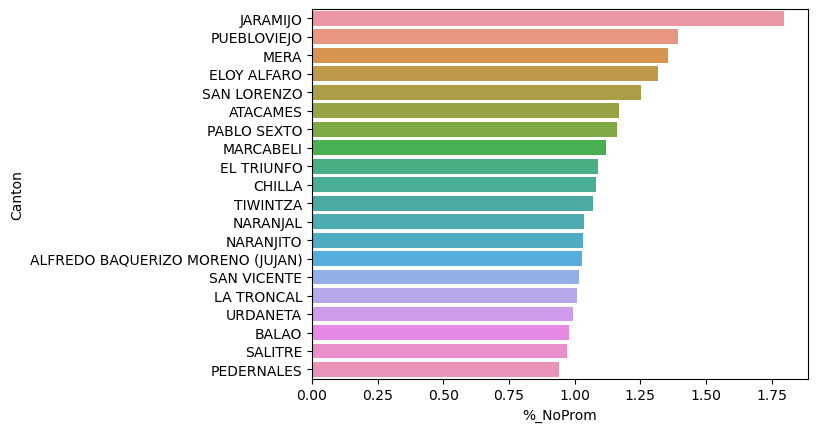

In [10]:
sns.barplot(data=data_EDU_2_noprom_top20, x="%_NoProm", y="Canton")

<AxesSubplot:xlabel='%_Aband', ylabel='Canton'>

/Users/pastudilloe/opt/anaconda3/envs/py37/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


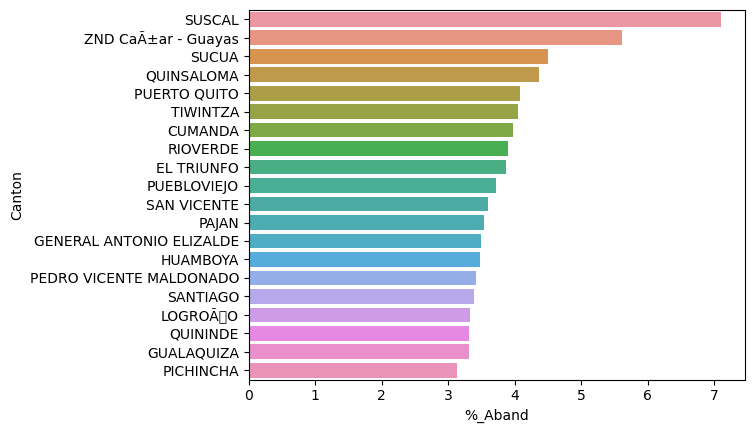

In [11]:
sns.barplot(data=data_EDU_2_aband_top20, x="%_Aband", y="Canton")

<AxesSubplot:xlabel='%_Aband', ylabel='Canton'>

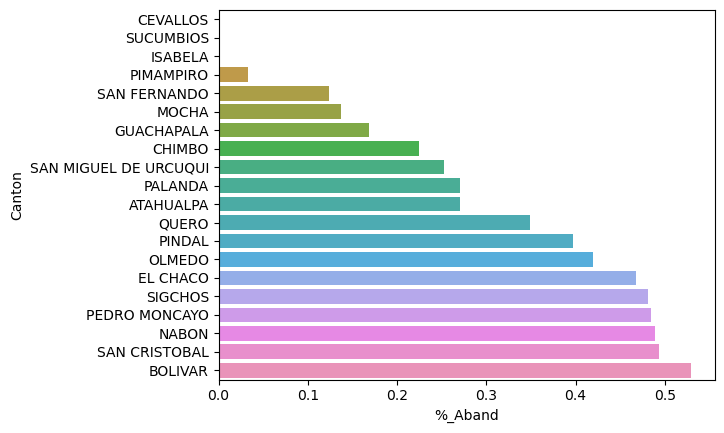

In [12]:
sns.barplot(data=data_EDU_2_aband_bottom20, x="%_Aband", y="Canton")